In [1]:
import pandas as pd


In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns

In [5]:
boston=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/be7be76aba60dfeda08217621330af3db37ad3db/Boston.csv')

In [6]:
iris=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/IRIS.csv')

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
x=boston.drop(['MEDV'],axis=1)

In [13]:
y=boston['MEDV']

In [14]:
from sklearn.model_selection import train_test_split  

In [16]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [17]:
 x_train.shape,x_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
 ss=StandardScaler()

In [23]:
x_train=ss.fit_transform(x_train)

In [24]:
x_train

array([[-0.14113619, -0.48175769, -0.19860022, ...,  0.00438903,
        -0.05084503, -0.01555641],
       [-0.42121529,  3.02166196, -1.33410259, ..., -1.68641979,
         0.42969249, -1.33650784],
       [-0.41266839, -0.48175769,  0.22414717, ...,  0.14148164,
         0.19739169, -0.10842497],
       ...,
       [-0.38944304, -0.48175769, -0.19860022, ...,  0.00438903,
         0.37963873,  0.77313338],
       [-0.41404001,  0.41002186, -0.81324318, ..., -0.72677154,
         0.43161763,  0.09671754],
       [-0.41578561,  2.06618387, -1.3831586 , ..., -0.04130851,
         0.39707198, -0.68781395]])

In [25]:
x_test=ss.fit_transform(x_test) 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
 from sklearn.neighbors import KNeighborsClassifier

In [29]:
knnreg=KNeighborsRegressor()

In [30]:
knncla=KNeighborsClassifier()

In [31]:
knnreg.fit(x_train,y_train)

KNeighborsRegressor()

In [32]:
y_pred=knnreg.predict(x_test) 

In [33]:
 from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
mean_absolute_error(y_test,y_pred)

2.672894736842105

In [43]:
mean_absolute_percentage_error(y_test,y_pred)

0.12748479708588126

In [46]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(mean_absolute_error(y_test,pred_i))

In [47]:
error_rate

[3.134210526315789,
 2.795065789473684,
 2.5309210526315793,
 2.5592105263157894,
 2.672894736842105,
 2.6517543859649124,
 2.7910714285714286,
 2.8222039473684206,
 2.8627192982456138,
 2.8897368421052634,
 2.9014952153110047,
 2.9251644736842106,
 2.9426619433198375,
 2.87687969924812,
 2.9153070175438596,
 2.943215460526315,
 2.928405572755418,
 2.9784722222222215,
 2.960560941828255,
 2.972763157894736,
 2.9944235588972425,
 3.029186602870813,
 3.02883295194508,
 3.0328673245614035,
 3.0655,
 3.0812500000000003,
 3.080750487329435,
 3.117763157894737,
 3.128493647912886,
 3.137214912280702,
 3.133000848896435,
 3.1576685855263156,
 3.1555223285486447,
 3.1607972136222906,
 3.1681766917293235,
 3.1903508771929823,
 3.192247510668563,
 3.2162049861495845,
 3.2415485829959514]

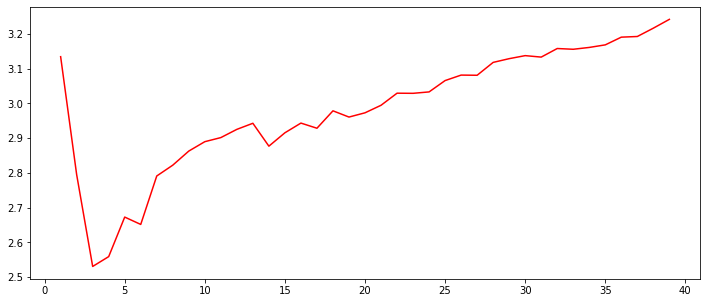

In [50]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(range(1,40),error_rate,color='red')
plt.show()

In [51]:
 iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [60]:
X=iris.drop('species',axis=1)

In [61]:
Y=iris['species']

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
 le=LabelEncoder()

In [66]:
Y=le.fit_transform(Y)

In [67]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
 from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=2529)

In [79]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
ss=StandardScaler()

In [83]:
X_train=ss.fit_transform(X_train)

In [84]:
X_train

array([[-0.45274402, -0.05379268,  0.53306676,  0.5028967 ],
       [-1.88933563, -0.05379268, -1.49576942, -1.42728124],
       [-0.19154555, -0.27972194, -0.00397811,  0.227157  ],
       [-0.84454173,  0.84992435, -1.25708281, -1.28941139],
       [-0.06094631, -0.95750971, -0.06364976, -0.18645256],
       [-0.7139425 ,  2.43142916, -1.25708281, -1.42728124],
       [-0.84454173,  1.75364139, -1.0183962 , -1.01367168],
       [-0.19154555, -1.18343897,  0.17503685, -0.04858271],
       [-1.23633945,  0.84992435, -1.0183962 , -1.28941139],
       [ 0.72264911, -1.18343897,  0.83142502,  1.05437611],
       [-0.06094631, -0.05379268,  0.3540518 ,  0.08928714],
       [ 0.20025216,  0.39806584,  0.71208172,  0.91650626],
       [-0.84454173,  1.75364139, -1.25708281, -1.15154153],
       [-1.10574021, -1.40936823, -0.18299307, -0.18645256],
       [ 0.59204988, -0.27972194,  0.41372346,  0.227157  ],
       [ 0.85324835,  0.39806584,  1.01043998,  1.60585552],
       [-0.32214479,  2.

In [85]:
X_test=ss.fit_transform(X_test)

In [86]:
X_test

array([[-0.84411839,  1.44663393, -1.38208209, -1.40129465],
       [-1.61260768,  0.69259694, -1.43496789, -1.27908873],
       [-0.40498166,  3.20605358, -1.38208209, -1.1568828 ],
       [ 0.03415508, -1.31816837,  0.78623548,  0.0651765 ],
       [ 1.68091784, -0.31278572,  1.31509342,  0.920618  ],
       [ 0.80264437, -0.81547704,  0.36314912,  0.0651765 ],
       [ 1.46134947, -0.81547704,  1.05066445,  0.67620614],
       [ 0.36350763,  0.18990561,  0.20449174,  0.18738242],
       [ 1.13199692, -0.31278572,  0.94489286,  0.920618  ],
       [-0.29519747, -0.81547704,  0.5218065 ,  1.28723579],
       [-0.18541329, -0.31278572,  0.5218065 ,  0.55400021],
       [-0.0756291 , -0.31278572,  0.36314912,  0.55400021],
       [ 0.91242855, -0.06144005,  0.5218065 ,  1.16502986],
       [ 2.01027039,  1.6979796 ,  1.20932183,  0.79841207],
       [-1.17347094,  0.18990561, -1.54073947, -1.40129465],
       [-0.29519747, -1.06682271,  0.5218065 ,  0.67620614],
       [ 0.03415508, -0.

In [87]:
knncla.fit(X_train,Y_train)

KNeighborsClassifier()

In [89]:
Y_pred=knncla.predict(X_test)

In [90]:
confusion_matrix(Y_test,Y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  8, 14]], dtype=int64)

In [91]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.53      1.00      0.69         9
           2       1.00      0.64      0.78        22

    accuracy                           0.82        45
   macro avg       0.84      0.88      0.82        45
weighted avg       0.91      0.82      0.83        45



In [92]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(mean_absolute_error(y_test,pred_i))

In [93]:
error_rate

[0.0,
 0.044444444444444446,
 0.0,
 0.022222222222222223,
 0.0,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.08888888888888889,
 0.1111111111111111]

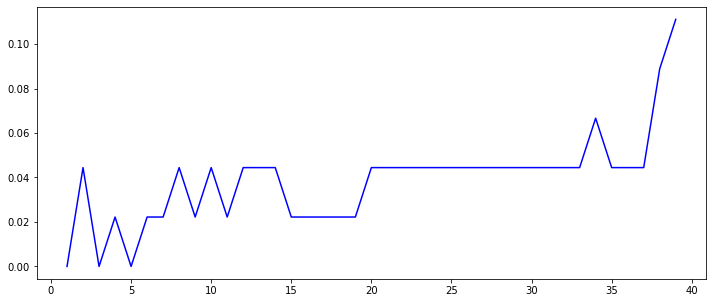

In [94]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(range(1,40),error_rate,color='blue')
plt.show()